# Credit card challenge - Description
# Part 1: unsupervised learning - clustering

- You are given a dataset of credit card transactions. The dataset contains 8500 customers and their activity over a 6-month period. Each transaction is characterized by 18 features described below.

- Your task is to find the most useful customer segmentation to improve the marketing campaigns of the company.

- The features:
customer_id : id of the credit card holder

balance_account : balance amount left in the account to make purchases at the end of the 6-month period

purchases_amount : amount of purchases made from account

paid_advance : number of transactions made with “Cash in Advance” method

full_purchases : maximum purchase amount done in full payment

balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)

installments : amount of purchases done in installments

purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)

purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)

cash_advance_frequency : how frequently the cash in advance being paid

nr_cash_advances : cash in advance given by the user

nr_purchases : number of purchase transactions made

credit_limit : limit of credit card for user

fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)

payments : amount of payment done by user

min_payments : minimum amount of payments made by user

full_payment_prc : percent of full payment paid by user

# Import librairies and functions

In [66]:
# import librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
# import KMeans
from sklearn.cluster import KMeans
# import colors from matplotlib
from matplotlib.pyplot import cm
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# import scaling function
from sklearn.preprocessing import StandardScaler
# import Elbow method visualizer
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns; sns.set(color_codes=True)
# import DBscan clustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
# import librairies for Silhouette Method
from sklearn.metrics import silhouette_samples, silhouette_score
import collections
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer

In [28]:
#Read csv file
card = pd.read_csv('card_transactions.csv')
#attribute = attribute.drop('Unnamed: 0', axis=1)
#attribute = attribute.drop_duplicates()

In [18]:
def normal_distribution(X0):
    # import librairy
    from scipy.stats import norm
    
    # Fit a normal distribution to the data:
    mu, std = norm.fit(X0)

    # Plot the histogram.
    plt.hist(X0, bins=25, density=True, alpha=0.6, color='g')
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

In [69]:
def silhouette(X,range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
            
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
            
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
            
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
            
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
            
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [78]:
def kmeans(points,n_clusters):
    # create kmeans object
    kmeans = KMeans(n_clusters=n_clusters)
    # fit kmeans object to data
    kmeans.fit(points)
    # print location of clusters learned by kmeans object
    print(kmeans.cluster_centers_)
    # save new clusters for chart
    y_km = kmeans.fit_predict(points)
    # Visualize clustering
    # set colors 
    colors=iter(cm.rainbow(np.linspace(0,1,n_clusters)))
    for i in range(n_clusters):
        plt.scatter(points[y_km ==i,0], points[y_km == i,1], s=100, color=next(colors), alpha = 0.5)  

In [110]:
def tsne(points,n_clusters):
    # create kmeans object
    from sklearn.manifold import TSNE
    tsne=TSNE(n_components=2,perplexity=35)
    #x_tsne = tsne.fit_transform(x)
    #kmeans = KMeans(n_clusters=n_clusters)
    # fit kmeans object to data
    tsne.fit(points)
    # print location of clusters learned by kmeans object
    #print(kmeans.cluster_centers_)
    # save new clusters for chart
    y_km = tsne.predict(points)
    # Visualize clustering
    # set colors 
    colors=iter(cm.rainbow(np.linspace(0,1,n_clusters)))
    for i in range(n_clusters):
        plt.scatter(points[y_km ==i,0], points[y_km == i,1], s=100, color=next(colors), alpha = 0.5)  

# Data Exploration

In [13]:
card.head()

customer_id  balance_account  purchases_amount  paid_advance  \
0  tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1  stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2  CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3  0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4  6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   

   purchases_frequency  full_purchases_frequency  \
0             0.909091                  0.000000   
1             1.000000                  0.000000   
2             0.000000                  0.000000   
3             1.000000                  1.000000   
4             0.083333                  0.083333   

   purchases_installments_frequency  cash_advance_frequency  nr_cash_advances  \
0                          0.818182                0.000000                 0   
1                          0.833333                0.000000                 0   
2                          0.000000                0.272727                 6   
3                          0.000000                0.000000                 0   
4                          0.000000                0.166667                 3   

   nr_purchases  credit_limit  fixed_rate_period     payments  min_payments  \
0            10        1000.0                 11    89.868853     89.711672   
1             6        1000.0                  6    54.722514     82.955180   
2             0        1500.0                 11   303.031979    443.781316   
3            13        2000.0                 12   704.240770    795.859808   
4             1        2500.0                 12  4094.261427     40.142262   

   full_payment_prc  
0          0.428571  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000

In [29]:
# drop column ID to avoid overfitting
card = card.drop(['customer_id'], axis=1)

In [21]:
# plot boxplot to see data distribution
sns.boxplot(data = card['full_purchases'])
None

In [17]:
card.describe()

balance_account  purchases_amount  paid_advance  full_purchases  \
count      8500.000000       8500.000000   8500.000000     8500.000000   
mean       1565.941403        999.561312    973.508540      588.165365   
std        2090.513302       2154.189460   2078.539061     1669.466184   
min           0.000000          0.000000      0.000000        0.000000   
25%         126.318369         39.000000      0.000000        0.000000   
50%         869.046468        360.000000      0.000000       37.400000   
75%        2053.674410       1105.897500   1113.726110      570.410000   
max       19043.138560      49039.570000  47137.211760    40761.250000   

       balance_frequency_update  installments  purchases_frequency  \
count               8500.000000   8500.000000          8500.000000   
mean                   0.876272    411.708492             0.489383   
std                    0.237517    910.142440             0.401075   
min                    0.000000      0.000000             0.000000   
25%                    0.875000      0.000000             0.083333   
50%                    1.000000     89.000000             0.500000   
75%                    1.000000    466.725000             0.916667   
max                    1.000000  22500.000000             1.000000   

       full_purchases_frequency  purchases_installments_frequency  \
count               8500.000000                       8500.000000   
mean                   0.201940                          0.363796   
std                    0.297756                          0.397162   
min                    0.000000                          0.000000   
25%                    0.000000                          0.000000   
50%                    0.083333                          0.166667   
75%                    0.285714                          0.750000   
max                    1.000000                          1.000000   

       cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
count             8500.000000       8500.000000   8500.000000   8499.000000   
mean                 0.135288          3.253647     14.677059   4485.848704   
std                  0.200892          6.854883     25.001561   3629.804040   
min                  0.000000          0.000000      0.000000     50.000000   
25%                  0.000000          0.000000      1.000000   1500.000000   
50%                  0.000000          0.000000      7.000000   3000.000000   
75%                  0.222222          4.000000     17.000000   6500.000000   
max                  1.500000        123.000000    358.000000  30000.000000   

       fixed_rate_period      payments  min_payments  full_payment_prc  
count        8500.000000   8500.000000   8202.000000       8500.000000  
mean           11.516118   1721.250989    865.594683          0.152587  
std             1.339121   2893.200899   2389.297977          0.291505  
min             6.000000      0.000000      0.019163          0.000000  
25%            12.000000    381.893717    168.712104          0.000000  
50%            12.000000    851.146953    310.399040          0.000000  
75%            12.000000   1897.014052    826.426929          0.142857  
max            12.000000  50721.483360  76406.207520          1.000000

In [36]:
list(card.columns)

['balance_account',
 'purchases_amount',
 'paid_advance',
 'full_purchases',
 'balance_frequency_update',
 'installments',
 'purchases_frequency',
 'full_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'nr_cash_advances',
 'nr_purchases',
 'credit_limit',
 'fixed_rate_period',
 'payments',
 'min_payments',
 'full_payment_prc']

## Describing dataset

In [10]:
pip install pandas-profiling

  Stored in directory: C:\Users\thiba\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: C:\Users\thiba\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\thiba\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse
Note: you may need to restart the kernel to use updated packages.


In [16]:
#get an overview of the dataset using profile_report from Pandas
import pandas_profiling
card.profile_report()

## handle missing values

### Strategy 1: delete rows with missing values

In [30]:
# drop rows with missing values
card_deleted_rows = card.dropna()

In [31]:
card_deleted_rows.shape

(8201, 17)

In [32]:
normal_distribution(card_deleted_rows['min_payments'])

In [33]:
normal_distribution(card_deleted_rows['payments'])

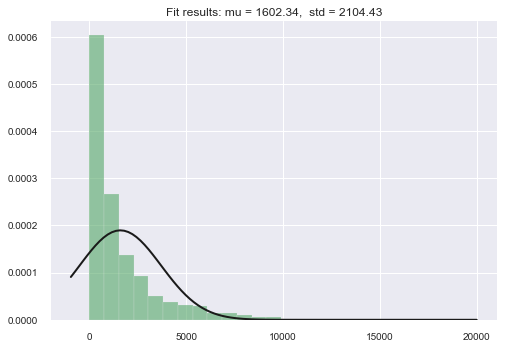

In [34]:
normal_distribution(card_deleted_rows['balance_account'])

### Strategy 2: imputing missing values

In [55]:
numeric_features = list(card.columns)

In [56]:
len(numeric_features)

17

In [63]:
X=card.loc[:,numeric_features].values

In [64]:
numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])

numeric_feat = list(range(len(numeric_features)))

featureencoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_feat)])

X = featureencoder.fit_transform(X)

In [65]:
X

array([[-7.44666187e-01, -4.14083256e-01, -4.68389471e-01, ...,
        -5.63900733e-01, -3.24752426e-01,  9.46810037e-01],
       [-7.23919816e-01, -3.94260249e-01, -4.68389471e-01, ...,
        -5.76049356e-01, -3.27580413e-01, -5.23475835e-01],
       [-9.81375232e-02, -4.64035375e-01, -2.45690422e-01, ...,
        -4.90219135e-01, -1.76553568e-01, -5.23475835e-01],
       ...,
       [-7.49114356e-01, -4.64035375e-01, -3.46235322e-01, ...,
         2.47726896e-01, -8.22989026e-18, -5.23475835e-01],
       [ 3.84823475e-02,  2.21807320e-02, -3.97830770e-01, ...,
        -4.34977359e-01, -1.54107306e-01, -5.23475835e-01],
       [ 1.41191797e-01,  3.49339262e-01, -4.68389471e-01, ...,
        -3.39889042e-01, -1.79360283e-01, -5.23475835e-01]])

# Define number of clusters

## Elbow analysis

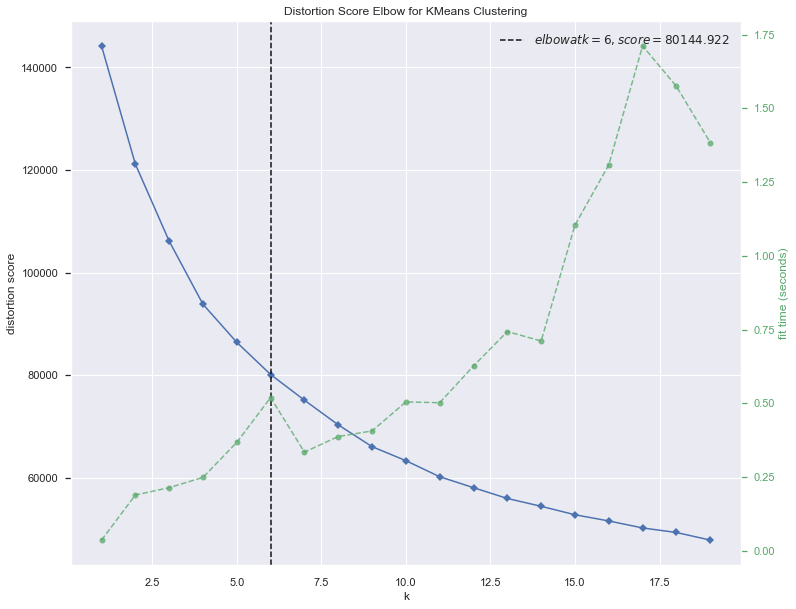

In [81]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

## Silhouette analysis

In [76]:
range_n_clusters=[4,5,6,7,8,9]

For n_clusters = 4 The average silhouette_score is : 0.19960054281735262
For n_clusters = 5 The average silhouette_score is : 0.19260763497292185
For n_clusters = 6 The average silhouette_score is : 0.20173655987106662
For n_clusters = 7 The average silhouette_score is : 0.21346918914697705
For n_clusters = 8 The average silhouette_score is : 0.2176260745156159
For n_clusters = 9 The average silhouette_score is : 0.2145813911434125


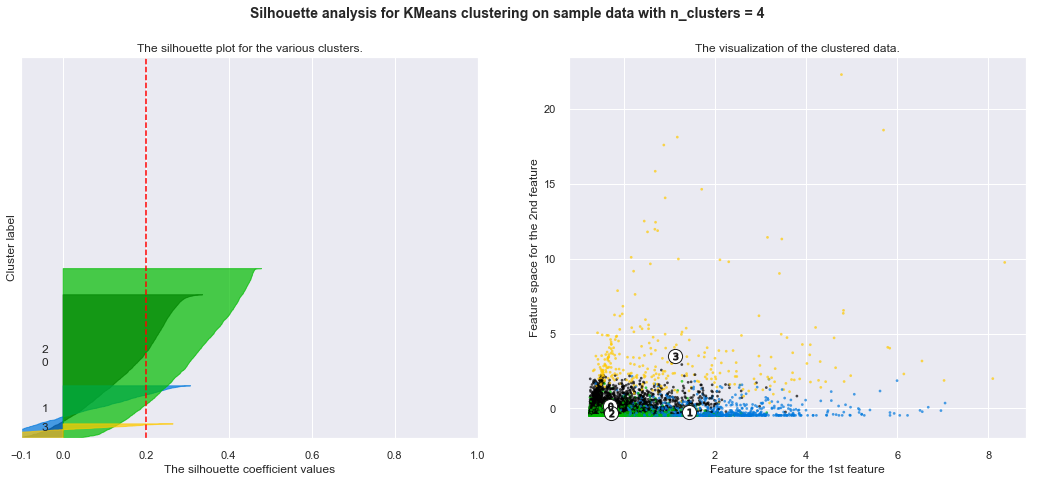

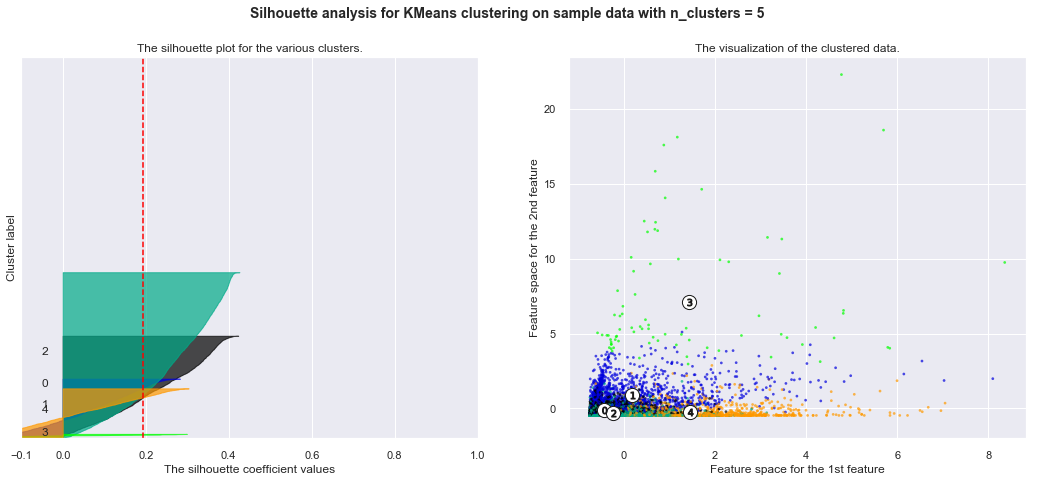

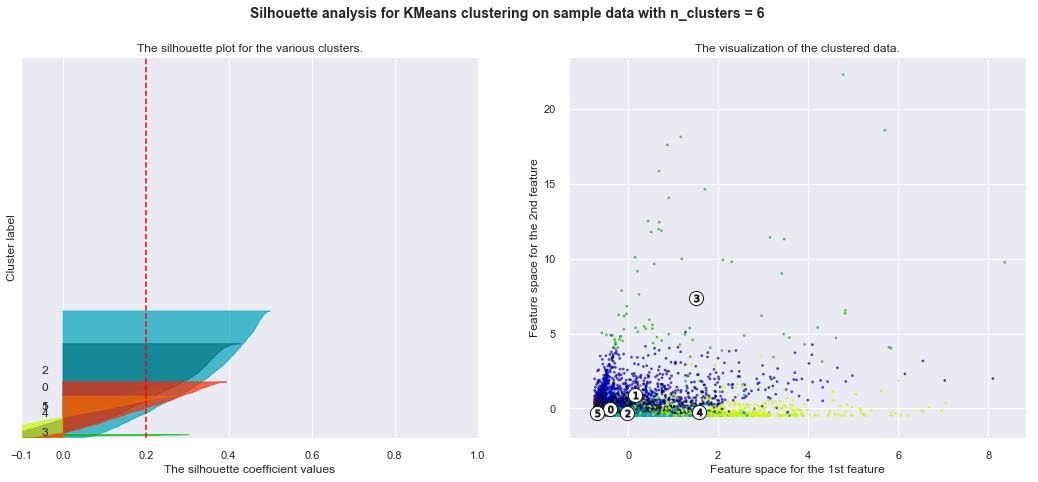

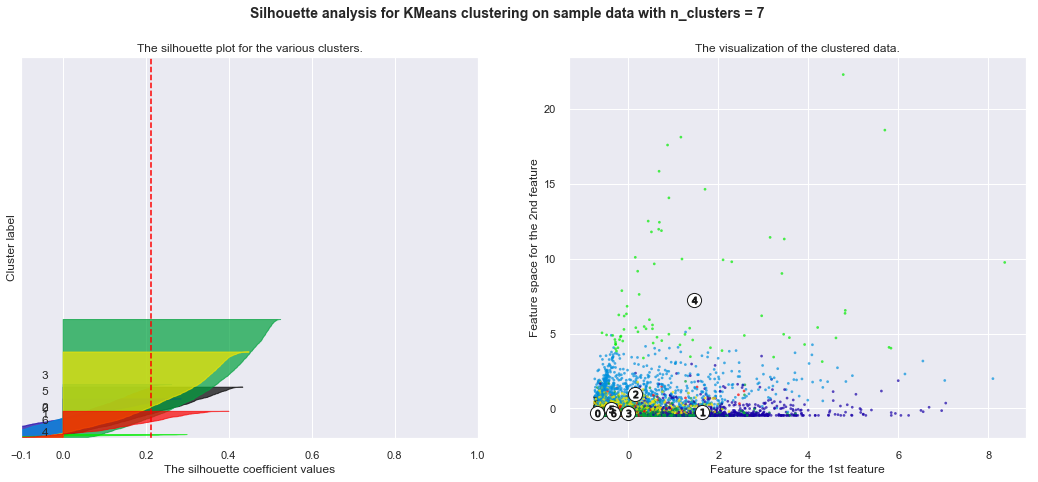

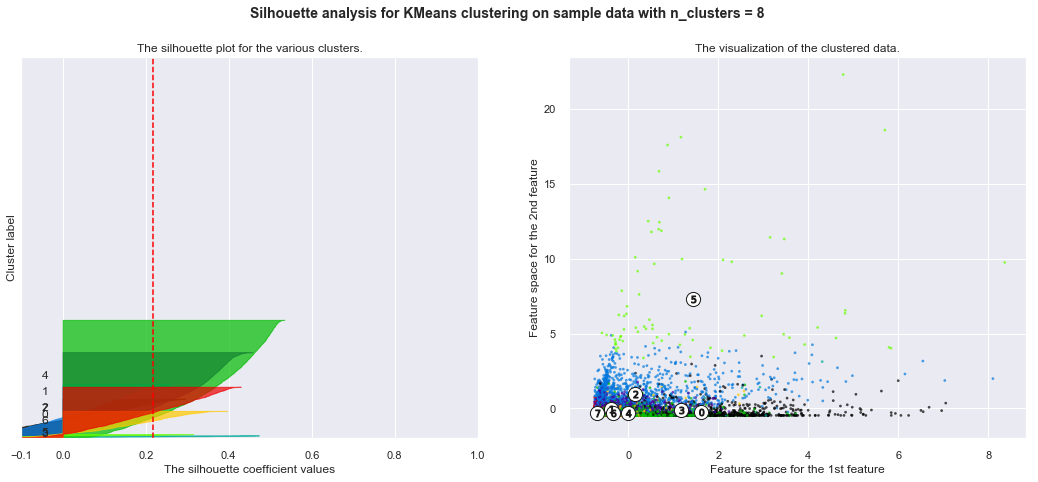

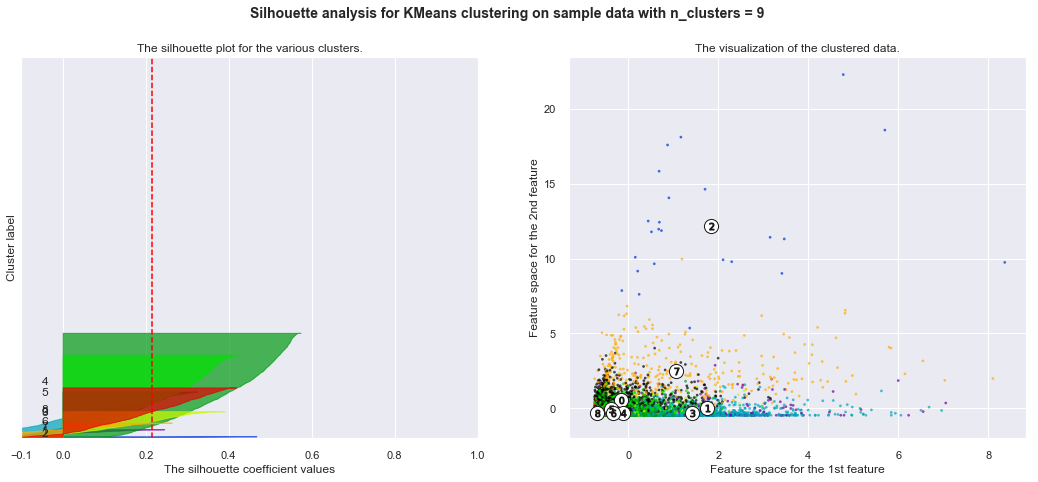

In [77]:
silhouette(X,range_n_clusters)

## K-means with 6 clusters

[[-1.95522557e-02 -3.40755943e-01 -9.06572309e-02 -2.19840828e-01
   3.75003399e-01 -4.03426269e-01 -8.24955310e-01 -3.33245383e-01
  -7.71544653e-01  1.17444573e-01 -3.82811664e-02 -4.67304670e-01
  -3.35423363e-01 -4.58697099e-03 -2.61162379e-01 -2.81074901e-02
  -4.48800156e-01]
 [-3.97043178e-01 -6.62543310e-02 -3.66392896e-01 -2.41098134e-01
   3.08077027e-01  2.85689373e-01  9.63757113e-01 -3.75699931e-01
   1.13682492e+00 -4.61228442e-01 -3.56156141e-01  1.17529697e-01
  -3.29891306e-01 -2.65068758e-02 -2.49325317e-01 -5.92660416e-02
   3.38122279e-01]
 [ 1.57451468e+00 -2.09007801e-01  1.91598604e+00 -1.53152060e-01
   3.84703680e-01 -2.13993300e-01 -4.55466753e-01 -1.86763728e-01
  -4.12945123e-01  1.89347183e+00  1.82814755e+00 -2.47721114e-01
   9.55272457e-01 -9.56339792e-02  7.22840347e-01  4.97693909e-01
  -3.98643766e-01]
 [ 1.44162951e+00  7.23024682e+00  1.33227741e-02  6.36943192e+00
   4.09647516e-01  5.42932348e+00  1.09493639e+00  1.87944583e+00
   1.06498408e+00 -

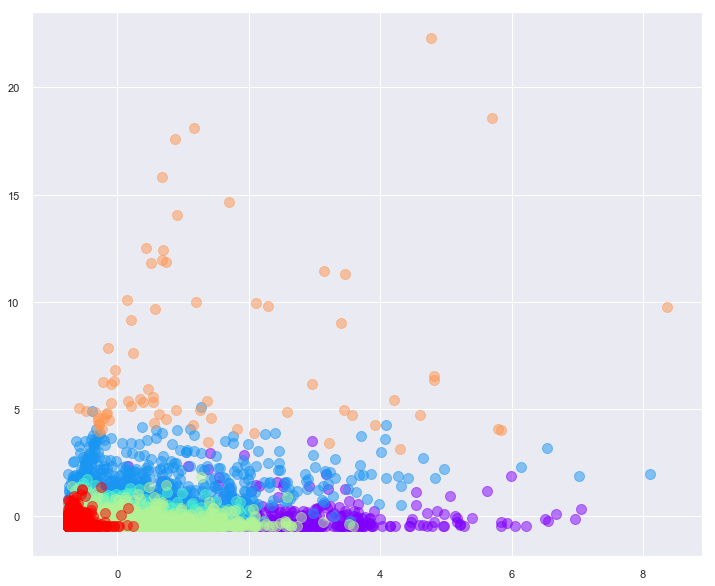

In [80]:
kmeans(X,6)

## Try cluster map

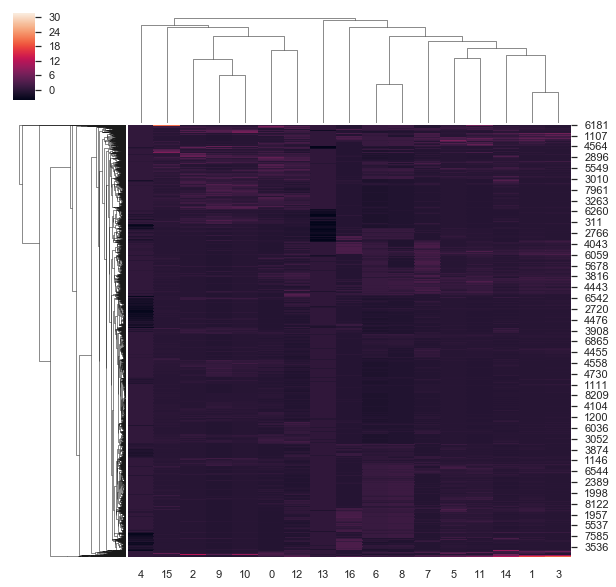

In [83]:
# Plot a matrix dataset as a hierarchically-clustered heatmap.
g = sns.clustermap(X)

In [85]:
# Plot heatmap on X matrix
g = sns.heatmap(X)

# Dimensionality reduction

## Using PCA (Principal Component Analysis)

In [87]:
from sklearn.decomposition import PCA

### Analyse the meaning of PCA variables

In [92]:
# Perform a PCA 
pca = PCA(n_components = 4) 
pca.fit_transform(X) 

array([[-0.2818514 , -2.00819966, -1.0511169 , -0.9774451 ],
       [-0.68287065, -1.70572004, -1.26628646, -2.02248455],
       [-1.9718153 ,  0.53188865,  0.11989456,  0.12920101],
       ...,
       [-2.41073936, -0.82203426,  2.43380192, -1.06131596],
       [ 0.53676014, -0.14582014,  0.09296686,  0.76485522],
       [ 1.45322064, -0.99408811, -0.66233929,  0.63911565]])

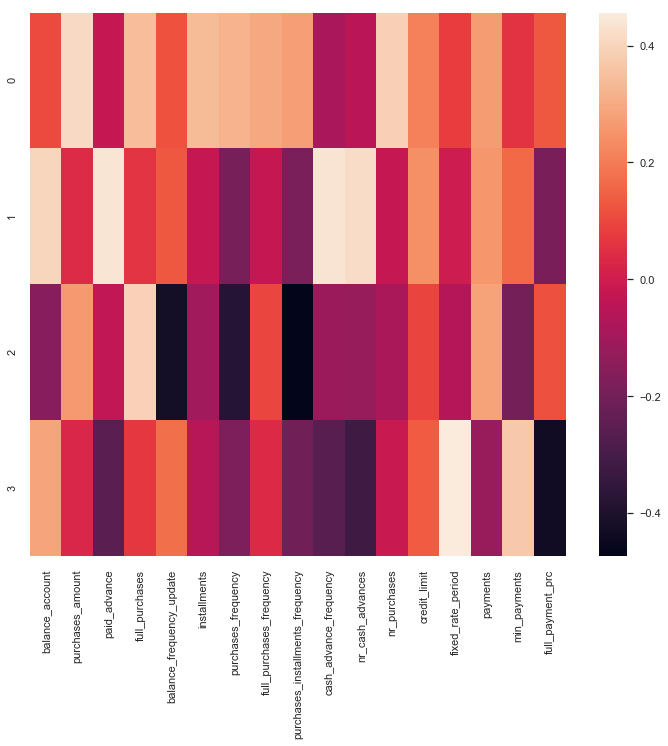

In [93]:
sns.heatmap(pd.DataFrame(pca.components_, columns=card.columns))

### Perform a PCA

In [103]:
# Perform a PCA to get 80% of the variance
pca = PCA(0.8) 
X_reduced = pca.fit_transform(X) 

In [101]:
# variance explanation
expl_var= list(pca.explained_variance_ratio_*100)
print('explained variance:', expl_var)
print('First component contains:', round(expl_var[0],2),'% of the variance')
print('Second component contains:', round(expl_var[1],2),'% of the variance')
#print('Third component contains:', round(expl_var[2],2),'% of the variance')
print('All components contain:', round(sum(expl_var),2),'% of the variance')

explained variance: [27.33576821278541, 20.331783854990768, 8.822813866278848, 7.467252835316191, 6.211815970349131, 5.709774077592533, 4.879829903717356]
First component contains: 27.34 % of the variance
Second component contains: 20.33 % of the variance
All components contain: 80.76 % of the variance


### Elbow on PCA variables

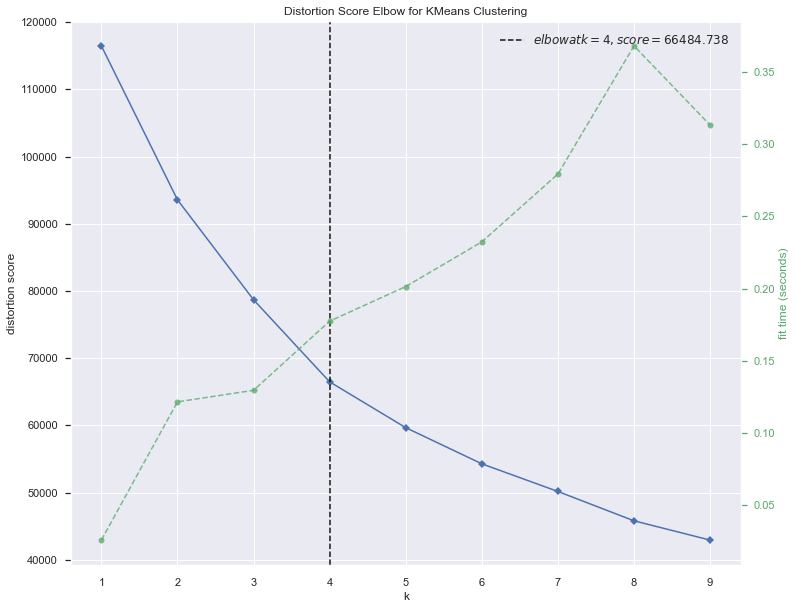

In [105]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_reduced)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

[[ 1.14741838 -1.07669801 -0.70172922 -0.2373197  -0.14078859 -0.14292641
  -0.1544974 ]
 [-0.46102963  3.45873898 -0.42173097 -0.38012669  0.01618389 -0.22843651
  -0.25563245]
 [-1.30337855 -0.23163287  0.60931102  0.28371803  0.07863757  0.13226859
   0.1601814 ]
 [ 7.90872141  1.23420417  1.5806111   0.44037836  0.52779259  0.8813964
   0.71919602]]


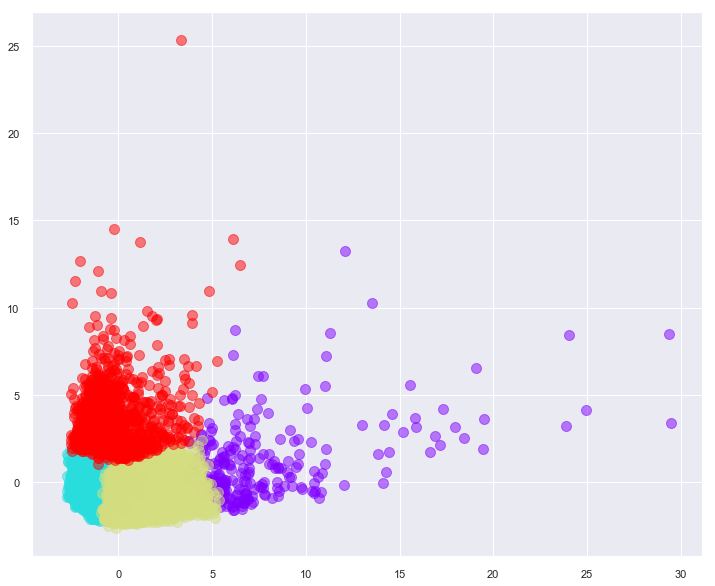

In [102]:
kmeans(X_reduced,4)

In [106]:
kmeans(X,4)

[[ 1.42995175 -0.23904892  1.65024092 -0.16795919  0.38987    -0.25795993
  -0.51941081 -0.22143131 -0.46388415  1.73731893  1.58857333 -0.287525
   0.81807428 -0.09359873  0.56537192  0.47349208 -0.4060926 ]
 [-0.28049119 -0.33788231 -0.19361372 -0.22836432 -0.38291319 -0.38087515
  -0.77300329 -0.38769449 -0.69272192 -0.12611425 -0.17873172 -0.46598119
  -0.33856046 -0.0603247  -0.26234737 -0.11868236 -0.24507816]
 [ 1.1697463   3.73938028 -0.06460516  3.25185604  0.45596468  2.88780702
   1.13568133  1.78352127  1.09685725 -0.25282893 -0.08790862  3.4025456
   1.62898063  0.32375574  2.4063862   0.63244327  0.46696738]
 [-0.28780699  0.16449785 -0.36424697  0.05114052  0.2721494   0.29549899
   1.00492341  0.38535342  0.8931714  -0.45947211 -0.35746569  0.36257578
  -0.03663737  0.07744086 -0.10198894 -0.08587781  0.39700376]]


## Using TSNE (t-distributed Stochastic Neighbor Embedding)

In [114]:
#import TSNE function from scikit-learn
from sklearn.manifold import TSNE
#perform TSNE 
x_tsne = TSNE(n_components=2,perplexity=35).fit_transform(X)

In [115]:
kmeans(x_tsne,4)

[[  2.652293   -44.770885  ]
 [-46.345573    -0.46761683]
 [ 37.735985    13.52935   ]
 [  3.1070328   51.177906  ]]


In [120]:
kmeans(x_tsne,6)

[[ 19.604958   -6.0121536  -9.917529 ]
 [  3.9575067  21.798073    5.1173944]
 [-21.167318    2.4042265   5.8477235]
 [ -8.971227    4.2467036 -20.56618  ]
 [ -4.561494  -23.412685   -2.4210854]
 [  8.414714   -6.945865   18.988028 ]]


In [126]:
x_tsne

array([[-30.155561 ,  -1.4659703,  -1.4457695],
       [-32.836914 , -15.784811 ,   1.4132618],
       [  2.0114906, -34.835815 ,   2.7880738],
       ...,
       [-16.740551 , -19.741196 , -16.604414 ],
       [ 12.648    ,   7.792951 ,   0.3420706],
       [ -0.5198471,  15.381804 ,   5.0101933]], dtype=float32)

# Perform other models

## DB-scan

### Choose data dimensions

In [127]:
x_tsne = TSNE(n_components=2,perplexity=35).fit_transform(X)

In [128]:
x_tsne

array([[-24.9116  , -41.104458],
       [-12.787307, -46.118782],
       [ 56.738083,  34.381886],
       ...,
       [ 59.9815  , -30.506079],
       [ -8.156522,  13.681701],
       [-35.470093,   9.863701]], dtype=float32)

### Building model

In [189]:
def run_db_scan(data,distance,samples):
    # define model
    db_scan = DBSCAN(eps = distance,min_samples = samples, metric='cosine')
    # fit model to our data
    db_scan.fit(data) 
    # get labels
    labels = db_scan.labels_ 
    # check number of labels
    unique_labels = list(set(labels))
    print('labels:',unique_labels)
    print('count labels:', collections.Counter(labels))
    return labels

In [190]:
labels = run_db_scan(x_tsne,0.05,5)

labels: [0]
count labels: Counter({0: 8500})


In [191]:
labels = run_db_scan(X_reduced,1.35,5)

labels: [0]
count labels: Counter({0: 8500})


In [195]:
labels = run_db_scan(X,0.05,2)

labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, -1]
count labels: Counter({0: 6501, -1: 1597, 11: 23, 7: 12, 32: 6, 54: 6, 141: 6, 15: 5, 49: 5, 108: 5, 133: 5, 27: 4, 30: 4, 43: 4, 72: 4, 74: 4, 76: 4, 118: 4, 2: 3, 3: 3, 9: 3, 14: 3, 19: 3, 22: 3, 23: 3, 29: 3, 34: 3, 39: 3, 50: 3, 53: 3, 56: 3, 57: 3, 58: 3, 60: 3, 62: 3, 67: 3, 68: 3, 70: 3, 73: 3, 86: 3, 88: 3, 92: 3, 97: 3, 103: 3

## Hierarchichal clustering

In [239]:
def hcluster(points,n_clusters):
    # create kmeans object
    clustering = AgglomerativeClustering(n_clusters = n_clusters,connectivity=None).fit(points)
    cluster_hc=clustering.labels_
    # fit kmeans object to data
    # save new clusters for chart
    #y_km = kmeans.fit_predict(points)
    # Visualize clustering
    # set colors 
    colors=iter(cm.rainbow(np.linspace(0,1,n_clusters)))
    for i in range(n_clusters):
        plt.scatter(points[cluster_hc ==i,0], points[cluster_hc == i,1], s=100, color=next(colors), alpha = 0.5)  

In [205]:
# Perform a PCA to get 80% of the variance
pca = PCA(0.8) 
x_pca = pca.fit_transform(X) 

In [206]:
clustering = AgglomerativeClustering(n_clusters = 4,connectivity=None).fit(x_pca)
cluster_hc=clustering.labels_

In [210]:
print('count labels:', collections.Counter(cluster_hc))

count labels: Counter({0: 3957, 3: 3243, 2: 868, 1: 432})


In [216]:
X

array([[-7.44666187e-01, -4.14083256e-01, -4.68389471e-01, ...,
        -5.63900733e-01, -3.24752426e-01,  9.46810037e-01],
       [-7.23919816e-01, -3.94260249e-01, -4.68389471e-01, ...,
        -5.76049356e-01, -3.27580413e-01, -5.23475835e-01],
       [-9.81375232e-02, -4.64035375e-01, -2.45690422e-01, ...,
        -4.90219135e-01, -1.76553568e-01, -5.23475835e-01],
       ...,
       [-7.49114356e-01, -4.64035375e-01, -3.46235322e-01, ...,
         2.47726896e-01, -8.22989026e-18, -5.23475835e-01],
       [ 3.84823475e-02,  2.21807320e-02, -3.97830770e-01, ...,
        -4.34977359e-01, -1.54107306e-01, -5.23475835e-01],
       [ 1.41191797e-01,  3.49339262e-01, -4.68389471e-01, ...,
        -3.39889042e-01, -1.79360283e-01, -5.23475835e-01]])

In [217]:
clustering = AgglomerativeClustering(n_clusters = 9,connectivity=None).fit(X)
cluster_hc=clustering.labels_

In [218]:
print('count labels:', collections.Counter(cluster_hc))

count labels: Counter({1: 2511, 0: 1952, 5: 1221, 2: 985, 4: 774, 3: 752, 8: 210, 7: 72, 6: 23})


In [220]:
hcluster(X,9)

## Transform original data using Min-Max Scaler

In [221]:
from sklearn.preprocessing import MinMaxScaler

In [222]:
X=card.loc[:,numeric_features].values

In [223]:
numeric_transformer = Pipeline(steps=[('onehot', MinMaxScaler()),('imputer', SimpleImputer(strategy='mean'))])

numeric_feat = list(range(len(numeric_features)))

featureencoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_feat)])

X = featureencoder.fit_transform(X)

In [226]:
range_n_clusters=[4,5,6]

In [228]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

For n_clusters = 4 The average silhouette_score is : 0.32056824537321904
For n_clusters = 5 The average silhouette_score is : 0.3187567405125909
For n_clusters = 6 The average silhouette_score is : 0.33342823667100513


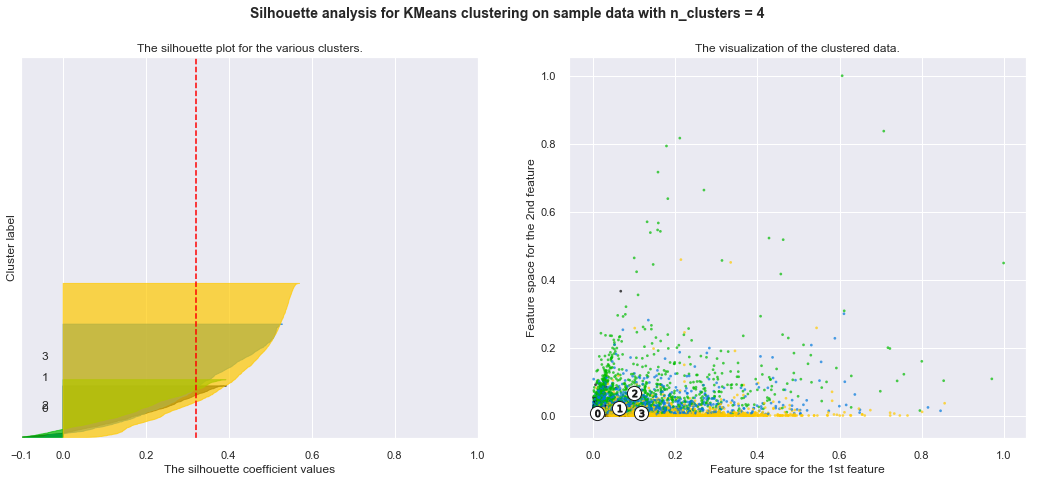

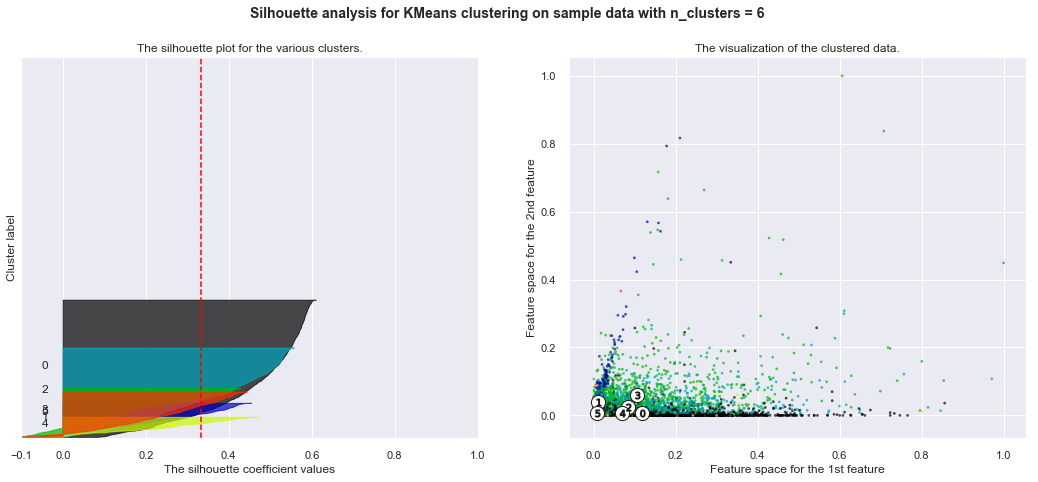

In [227]:
silhouette(X,range_n_clusters)

In [229]:
clustering = AgglomerativeClustering(n_clusters = 9,connectivity=None).fit(X)
cluster_hc=clustering.labels_

In [231]:
print('count labels:', collections.Counter(cluster_hc))

count labels: Counter({1: 2853, 5: 1318, 3: 1016, 0: 913, 2: 819, 6: 432, 4: 397, 8: 397, 7: 355})


In [230]:
hcluster(X,9)

# Final clustering

## data pre-processing

In [240]:
X=card.loc[:,numeric_features].values

In [241]:
numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])

numeric_feat = list(range(len(numeric_features)))

featureencoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_feat)])

X = featureencoder.fit_transform(X)

## Clustering on scaled data using Hierarchical model

In [244]:
clustering = AgglomerativeClustering(n_clusters = 7,connectivity=None).fit(X)
cluster_hc=clustering.labels_

In [245]:
print('count labels:', collections.Counter(cluster_hc))

count labels: Counter({1: 2704, 0: 2583, 5: 1221, 2: 985, 4: 774, 3: 210, 6: 23})


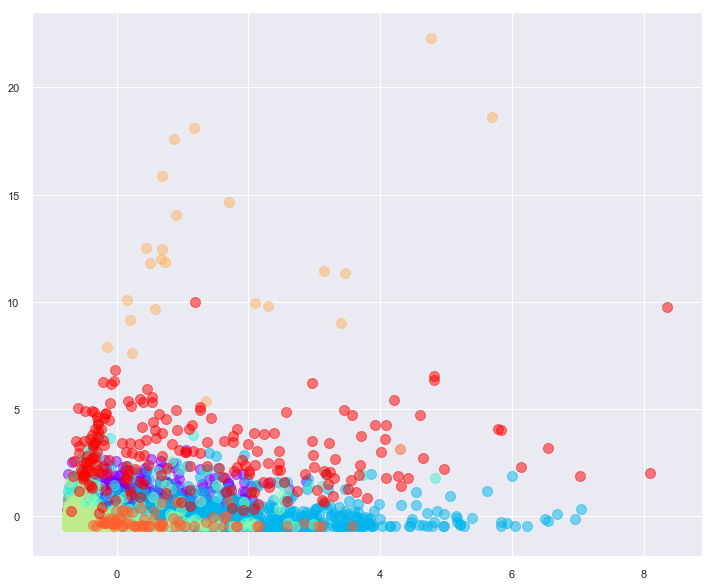

In [246]:
hcluster(X,9)

## Concatenate labels to original data

In [247]:
cluster_hc.shape

(8500,)

In [251]:
card_labelled=card

In [252]:
card_labelled['label']=cluster_hc

In [253]:
card_labelled.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0         9.298409            107.60      0.000000            0.00   
1        52.666422            150.30      0.000000            0.00   
2      1360.795674              0.00    462.861443            0.00   
3      2021.641161            363.18      0.000000          363.18   
4        22.322374             95.00   1162.045833           95.00   

   balance_frequency_update  installments  purchases_frequency  \
0                  0.909091         107.6             0.909091   
1                  1.000000         150.3             1.000000   
2                  1.000000           0.0             0.000000   
3                  1.000000           0.0             1.000000   
4                  0.363636           0.0             0.083333   

   full_purchases_frequency  purchases_installments_frequency  \
0                  0.000000                          0.818182   
1                  0.000000                          0.833333   
2                  0.000000                          0.000000   
3                  1.000000                          0.000000   
4                  0.083333                          0.000000   

   cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0                0.000000                 0            10        1000.0   
1                0.000000                 0             6        1000.0   
2                0.272727                 6             0        1500.0   
3                0.000000                 0            13        2000.0   
4                0.166667                 3             1        2500.0   

   fixed_rate_period     payments  min_payments  full_payment_prc  label  
0                 11    89.868853     89.711672          0.428571      1  
1                  6    54.722514     82.955180          0.000000      4  
2                 11   303.031979    443.781316          0.000000      4  
3                 12   704.240770    795.859808          0.000000      1  
4                 12  4094.261427     40.142262          0.000000      5

# Save updated dataframe

In [275]:
# save the dataframe to a csv file without the index
card_labelled.to_csv('card_labelled.csv', index=False)